## connect mysql and python 


### instal library 

In [45]:
import sqlalchemy as sqlm
import pandas as pd 


In [46]:
from sqlalchemy import create_engine


username = 'root'
password = 'E.A.G.L.E.S.06'
host = 'localhost'
database = 'target_brilliance'

# BACH TCONNENTA KADIR HAD comande darori
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database}')

# BACH T2AAKD RAHA CONNECTER MZN
try:
    with engine.connect() as connection:
        print("Connexion réussie à la base de données MySQL !")
except Exception as e:
    print(f"Erreur de connexion : {e}")


Connexion réussie à la base de données MySQL !


In [47]:

query = "SELECT * FROM big_cati"

cate_by_ville = pd.read_sql(query, engine)




In [48]:
cate_by_ville

,category,city,total_items_sold
0,bed table bath,sao paulo,1603
1,HEALTH BEAUTY,sao paulo,1445
2,sport leisure,sao paulo,1109
3,housewares,sao paulo,1039
4,Furniture Decoration,sao paulo,1036
5,computer accessories,sao paulo,990
6,Watches present,sao paulo,686
7,bed table bath,rio de janeiro,674
8,toys,sao paulo,564
9,telephony,sao paulo,525


In [49]:

query = "SELECT * FROM little_cat"

cate_by_ville_min = pd.read_sql(query, engine)

In [50]:
cate_by_ville_min

,category,city,total_items_sold
0,pet Shop,itapicuru,1
1,audio,araraquara,1
2,Cool Stuff,bom jesus da lapa,1
3,telephony,pinhais,1
4,Garden tools,varzea paulista,1
5,electronics,pato bragado,1
6,Industry Commerce and Business,toledo,1
7,Fashion Bags and Accessories,monte alto,1
8,telephony,santa fe do sul,1
9,Cool Stuff,cunha,1


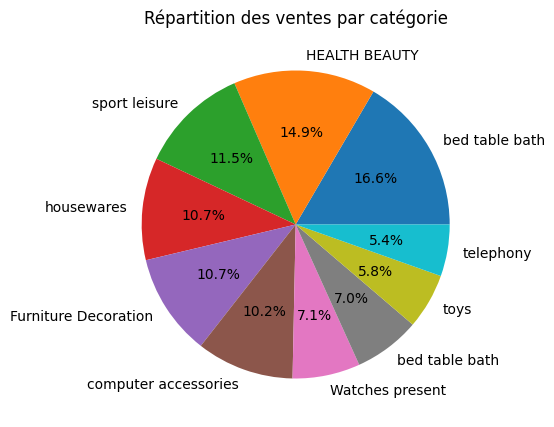

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.pie(
    cate_by_ville['total_items_sold'],                
    labels=cate_by_ville['category'],            
    autopct='%1.1f%%'               
                      
)


plt.title("Répartition des ventes par catégorie")


plt.show()


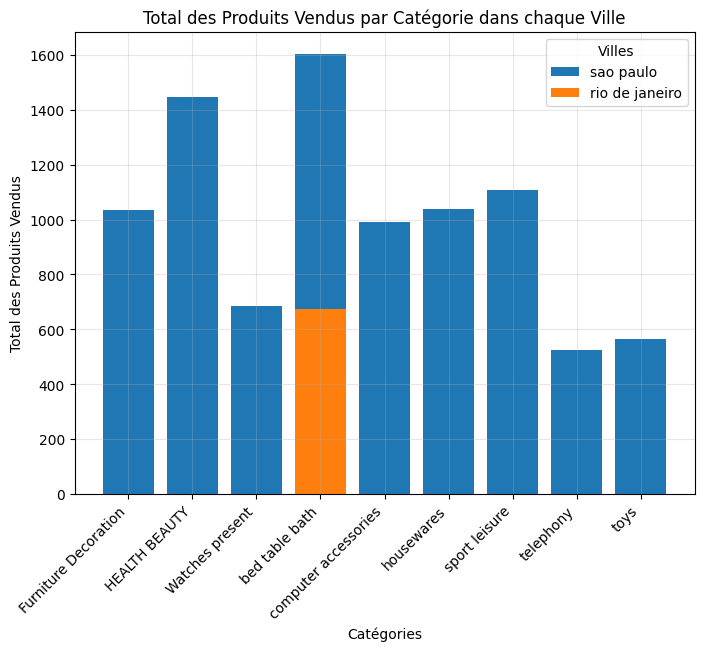

In [52]:
import matplotlib.pyplot as plt

# Data li ghadi njm3o, ch7al tba3 lina mn produit f chaque catégorie w ville
data = cate_by_ville.groupby(["category", "city"]).agg({'total_items_sold':'sum'}).reset_index()

plt.figure(figsize=(8, 6))

for city in data["city"].unique():
    city_data = data[data["city"] == city] 
    plt.bar(city_data["category"], city_data["total_items_sold"], label=city)


plt.xlabel("Catégories")
plt.ylabel("Total des Produits Vendus")
plt.title("Total des Produits Vendus par Catégorie dans chaque Ville")
plt.xticks(rotation=45, ha='right')


plt.legend(title="Villes", loc='upper right')


plt.grid(alpha=0.3)
plt.show()



knla7ed bli lproduit litba3 liya bzaf howa bed table bath f san paolo o 7ta reo dejaniro o san paulo hiya aktar mdina tba3o liya fiha les produit fga3 les category ktar mn reo dejaniro ya3ni bli rah kanbii3 mzn f san paulo o  reou dejaniro kitba3 liya fih produit wa7d les mzn li howa bed table bath

 le produit qui se vend le plus est Bed Table Bath, principalement dans São Paulo et Rio de Janeiro. Cependant, São Paulo est la ville où la majorité des catégories de produits sont vendues, tandis que Rio de Janeiro se distingue par la vente unique et importante d'un seul produit, "Bed Table Bath". Cela signifie que nous vendons très bien à São Paulo, où il y a une demande diversifiée, alors qu'à Rio de Janeiro, les ventes se concentrent surtout sur Bed Table Bath

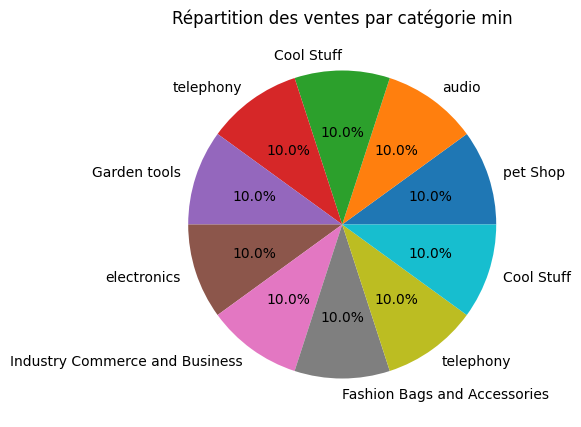

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.pie(
    cate_by_ville_min['total_items_sold'],                
    labels=cate_by_ville_min['category'],            
    autopct='%1.1f%%'               
                      
)


plt.title("Répartition des ventes par catégorie min")


plt.show()

SI ca les category il n pas vendes bien il y a plusieure cate=gory comme sa

In [54]:
query1 = "select * from cate_sans_ville"

In [55]:
cate_sans_ville = pd.read_sql(query1,engine)

In [56]:
cate_sans_ville

,category,total_items_sold
0,insurance and services,2
1,Fashion Children's Clothing,6
2,PC Gamer,6
3,La Cuisine,11
4,Kitchen portable and food coach,12
...,...,...
69,computer accessories,6393
70,Furniture Decoration,6768
71,sport leisure,6982
72,HEALTH BEAUTY,7976


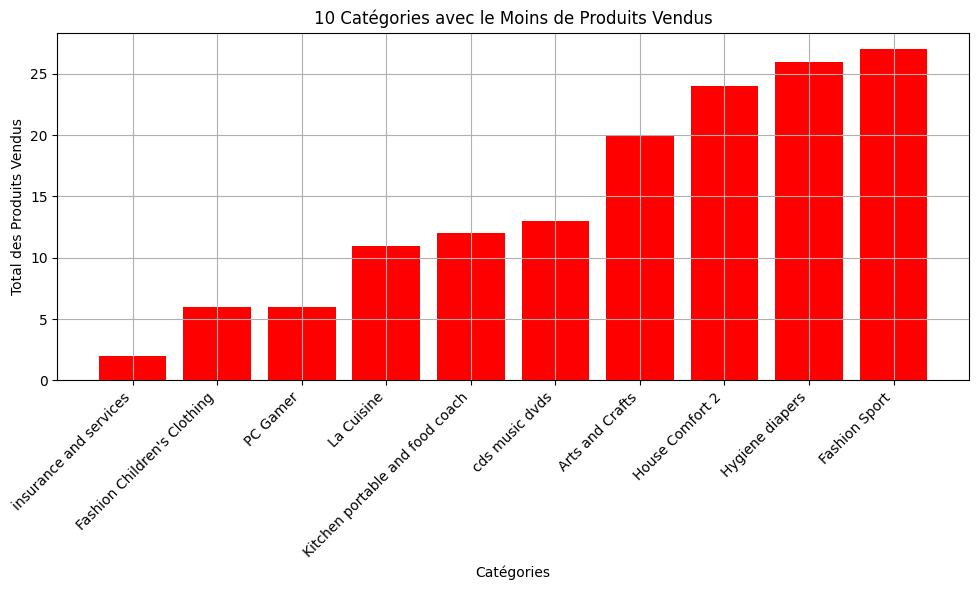

In [72]:

query1_sorted = cate_sans_ville.sort_values(by="total_items_sold", ascending=True).head(10)


plt.figure(figsize=(10, 6))
plt.bar(query1_sorted["category"], query1_sorted["total_items_sold"], color='red')


plt.xlabel("Catégories")
plt.ylabel("Total des Produits Vendus")
plt.title("10 Catégories avec le Moins de Produits Vendus")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.grid()
plt.show()


###  10 Catégories avec le Moins de Produits Vendus:

Ce graphique met en évidence les catégories de produits qui ont les ventes les plus faibles.
Des catégories telles que Vêtements pour enfants, PC Gamer,et Cuisine portable et coach alimentaire ont des ventes très faibles par rapport aux autres.
Il semble que certaines catégories de niche ou produits spécialisés aient de faibles ventes, ce qui pourrait indiquer soit une demande faible pour ces produits, soit un manque de marketing ou de visibilité.

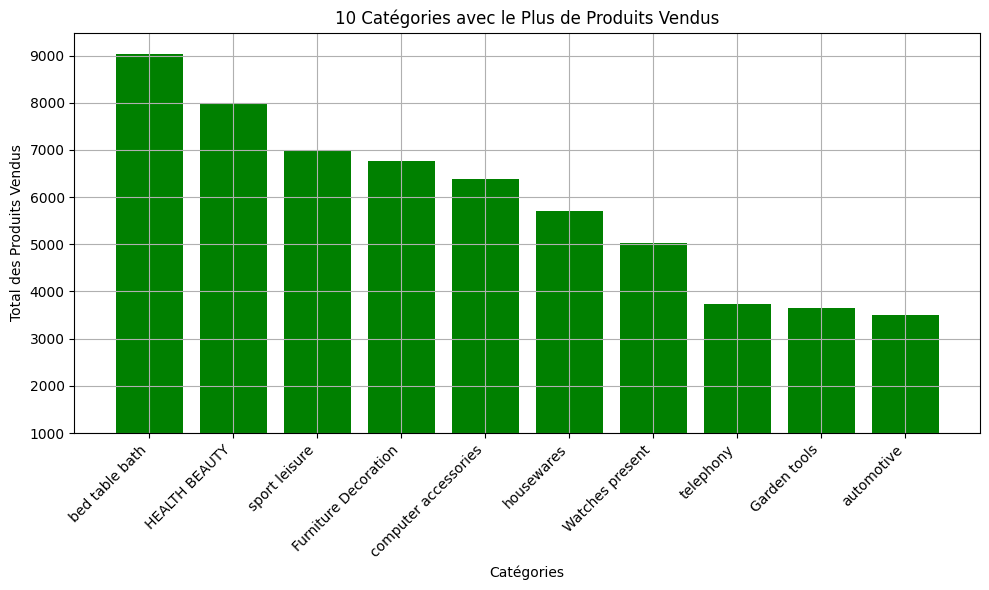

In [ ]:

query1_sorted = cate_sans_ville.nlargest(10, 'total_items_sold')


plt.figure(figsize=(10, 6))
plt.bar(query1_sorted["category"], query1_sorted["total_items_sold"], color='green')


plt.xlabel("Catégories")
plt.ylabel("Total des Produits Vendus")
plt.title("10 Catégories avec le Plus de Produits Vendus")
plt.xticks(rotation=45, ha='right')
plt.ylim(1000)


plt.tight_layout()
plt.grid()
plt.show()


### 10 Catégories avec le Plus de Produits Vendus :

Ce graphique montre les catégories de produits avec les ventes les plus élevées.
bed table bath et  HEALTH BEAUT  sont les catégories leaders, montrant un nombre important d'articles vendus.
Des catégories telles que sport leisure, Furniture Decoration et computer accessories performaient également bien.
Ces catégories semblent être plus populaires, avec une forte demande, ce qui peut être dû à leur attrait général ou à de meilleures stratégies de marketing.
